In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#한글 깨짐 방지

from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#경고 메세지 발생 무시

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [7]:
import os

In [9]:
os.chdir('C:/Users/82109/데이콘 피파 예측')

In [232]:
train=pd.read_csv('FIFA_train.csv')

In [233]:
test=pd.read_csv('FIFA_test.csv')

# 데이터 형태 확인

In [12]:
train.shape

(8932, 12)

In [15]:
test.shape

(3828, 11)

In [137]:
train.head(10)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
5,12,D. Godín,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0
6,13,David Silva,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
8,18,M. ter Stegen,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0
9,19,T. Courtois,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0


# 시각화

In [23]:
plt.style.use('fivethirtyeight')

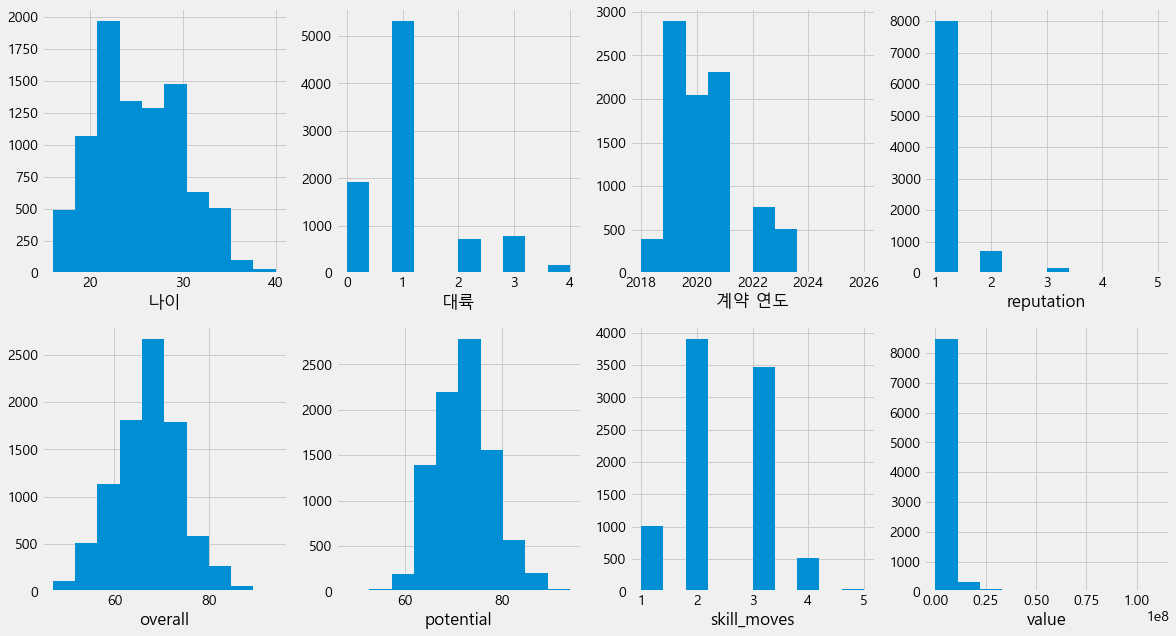

In [250]:
plt.rcParams.update({'font.size':14})

plt.figure(figsize=(18,10))
plt.subplot(2,4,1)

plt.hist(train['age'])
plt.xlabel('나이')

plt.subplot(2,4,2)
plt.hist(train['continent'])
plt.xlabel('대륙')

plt.subplot(2,4,3)
plt.hist(train['contract_until'])
plt.xlabel('계약 연도')

plt.subplot(2,4,4)
plt.hist(train['reputation'])
plt.xlabel('reputation')

plt.subplot(2,4,5)
plt.hist(train['stat_overall'])
plt.xlabel('overall')

plt.subplot(2,4,6)
plt.hist(train['stat_potential'])
plt.xlabel('potential')

plt.subplot(2,4,7)
plt.hist(train['stat_skill_moves'])
plt.xlabel('skill_moves')

plt.subplot(2,4,8)
plt.hist(train['value'])
plt.xlabel('value')


plt.show()

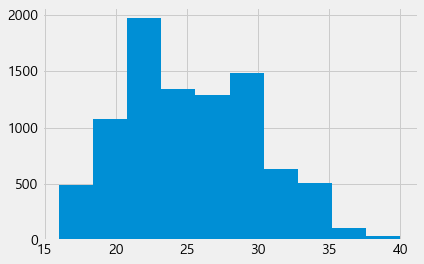

In [24]:
plt.hist(train['age']);

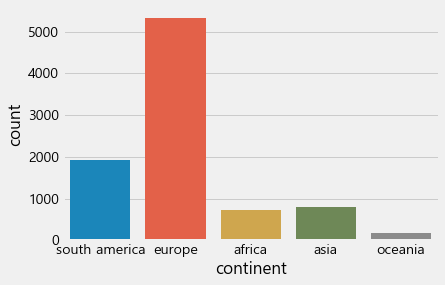

In [26]:
sns.countplot(train['continent']);

In [30]:
train.groupby(['continent'])['value'].mean()

continent
africa           2.972247e+06
asia             1.035146e+06
europe           2.928125e+06
oceania          8.225429e+05
south america    3.183204e+06
Name: value, dtype: float64

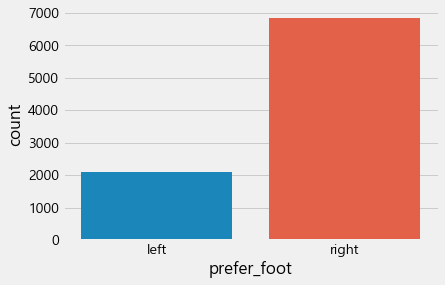

In [33]:
sns.countplot(train['prefer_foot']);

In [34]:
train.groupby('prefer_foot')['value'].mean()

prefer_foot
left     2.865232e+06
right    2.752150e+06
Name: value, dtype: float64

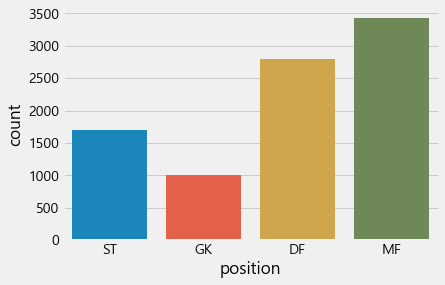

In [35]:
sns.countplot(train['position']);

In [36]:
train.groupby('position')['value'].mean()

position
DF    2.304348e+06
GK    1.992073e+06
MF    3.121762e+06
ST    3.330361e+06
Name: value, dtype: float64

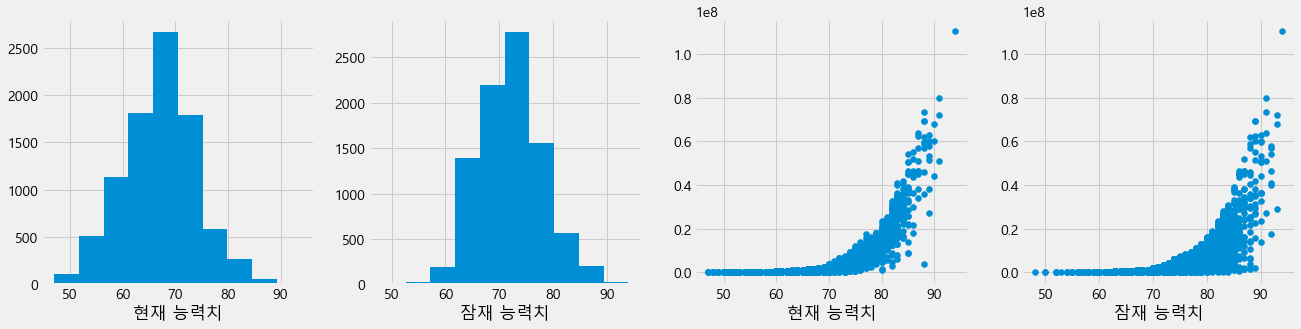

In [54]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(train['stat_overall'])
plt.xlabel('현재 능력치')

plt.subplot(2,4,2)
plt.hist(train['stat_potential'])
plt.xlabel('잠재 능력치')

plt.subplot(2,4,3)
plt.scatter(train['stat_overall'],train['value'])
plt.xlabel('현재 능력치')


plt.subplot(2,4,4)
plt.scatter(train['stat_potential'],train['value'])
plt.xlabel('잠재 능력치')

plt.show()

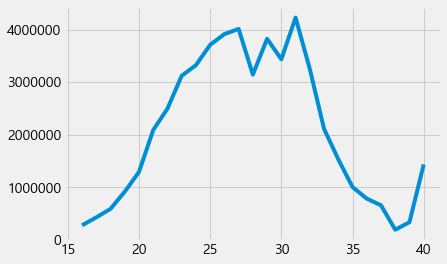

In [59]:
plt.plot(train.groupby(['age'])['value'].mean());

# 변수 변환

In [234]:
# slice 후 문자열인 변수타입을 숫자인 float로 바꾸기
train['contract_until']=train['contract_until'].str.slice(-4,).astype(float)

In [235]:
test['contract_until']=test['contract_until'].str.slice(-4,).astype(float)

In [184]:
train['contract_until']

0       2021.0
1       2020.0
2       2021.0
3       2020.0
4       2021.0
         ...  
8927    2019.0
8928    2020.0
8929    2021.0
8930    2021.0
8931    2020.0
Name: contract_until, Length: 8932, dtype: float64

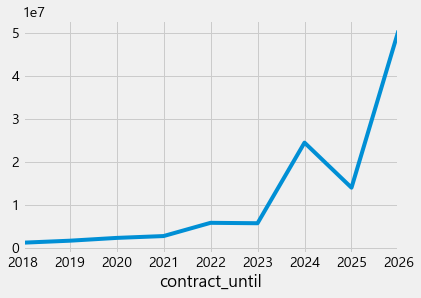

In [185]:
train.groupby(['contract_until'])['value'].mean().plot();

# 범주형 변수 더미변수화 하기

In [236]:
train['continent']=train['continent'].map({'south america':0,
                                                     'europe':1,
                                                     'africa':2,
                                                     'asia':3,
                                                     'oceania':4})

In [237]:
test['continent']=test['continent'].map({'south america':0,
                                                     'europe':1,
                                                     'africa':2,
                                                     'asia':3,
                                                     'oceania':4})

In [238]:
train['position']=train['position'].map({'ST':0,'GK':1,'DF':2,'MF':3})

In [239]:
test['position']=test['position'].map({'ST':0,'GK':1,'DF':2,'MF':3})

In [240]:
train['prefer_foot']=train['prefer_foot'].map({'left':0,'right':1})


In [241]:
test['prefer_foot']=test['prefer_foot'].map({'left':0,'right':1})

In [242]:
train.head(30)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,0,2021.0,0,0,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,1,2020.0,1,1,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,0,2021.0,0,1,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,1,2020.0,2,1,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,1,2021.0,1,1,3.0,90,93,1.0,68000000.0
5,12,D. Godín,32,0,2019.0,2,1,3.0,90,90,2.0,44000000.0
6,13,David Silva,32,1,2020.0,3,0,4.0,90,90,4.0,60000000.0
7,14,N. Kanté,27,1,2023.0,3,1,3.0,89,90,2.0,63000000.0
8,18,M. ter Stegen,26,1,2022.0,1,1,3.0,89,92,1.0,58000000.0
9,19,T. Courtois,26,1,2024.0,1,0,4.0,89,90,1.0,53500000.0


In [163]:
train.dtypes

id                    int64
name                 object
age                   int64
continent             int64
contract_until      float64
position              int64
prefer_foot           int64
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

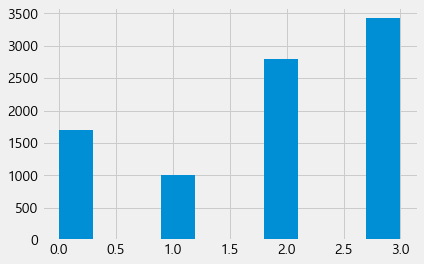

In [164]:
plt.hist(train['position']);

In [271]:
train.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,0.192229,-0.143197,-0.035397,0.037208,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,-0.065238,-0.132052,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319
continent,0.192229,-0.065238,1.000000,-0.030104,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650
contract_until,-0.143197,-0.132052,-0.030104,1.000000,0.007469,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638
position,-0.035397,0.001796,0.013761,0.007469,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506
prefer_foot,0.037208,0.007760,0.017691,-0.004760,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204
reputation,-0.423739,0.263468,-0.053510,0.070446,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,-0.186096,0.156983,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,-0.180026,0.258477,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,-0.050928,0.082641,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500


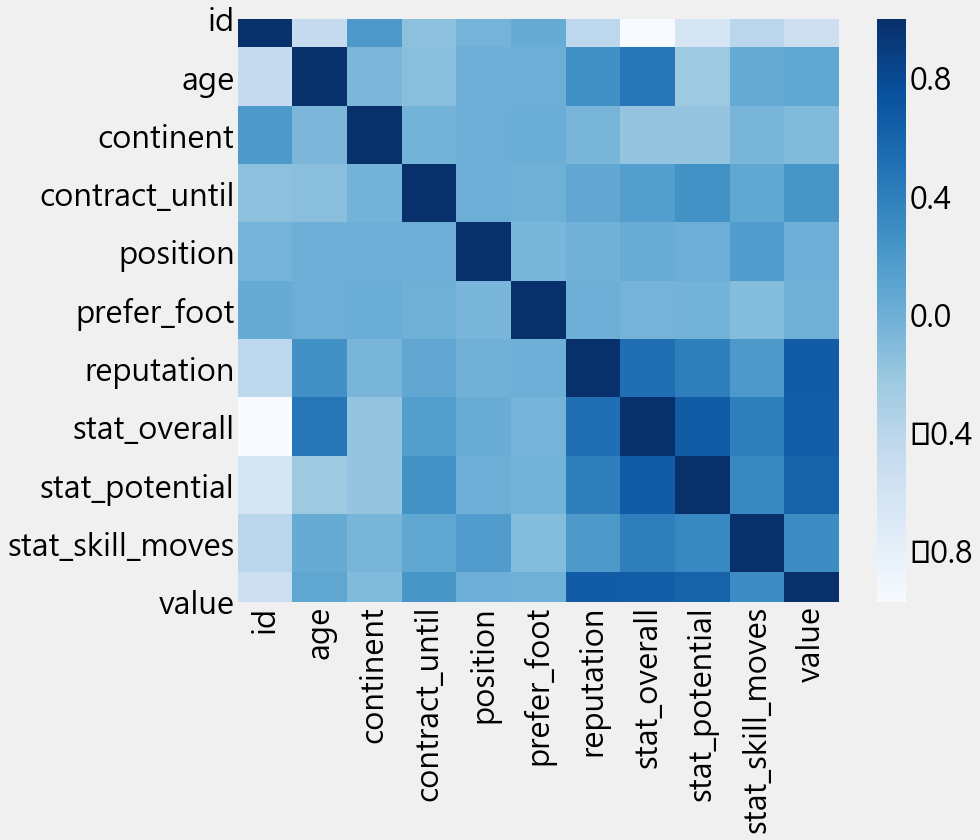

In [265]:
plt.rcParams.update({'font.size':13})

plt.figure(figsize=(12,10))
plt.rc(group= 'font',size=32)
sns.heatmap(train.loc[:].corr(), cmap='Blues')
plt.show()

In [272]:
#reputation 과 stat_overall 을 합쳐 새로운 nowrepstat 만들어보기
train_new=train
test_new=test

In [276]:
train_new['nowrepstat']=train['reputation']+train['stat_overall']
test_new['nowrepstat']=test['reputation']+test['stat_overall']

In [277]:
train_new_2= train_new.drop(['id','name'],axis=1)

In [278]:
train_new_fit=train_new_2.drop(['value'],axis=1)
train_new_trg=train_new_2['value']
tr_new_x,vl_new_x,tr_new_y,vl_new_y=train_test_split(train_new_fit,train_new_trg,test_size=0.25,shuffle=True,random_state=613)

In [275]:
from sklearn.model_selection import train_test_split


In [243]:
train_2= train.drop(['id','name'],axis=1)


In [244]:
train_fit=train_2.drop(['value'],axis=1)
train_trg=train_2['value']
tr_x,vl_x,tr_y,vl_y=train_test_split(train_fit,train_trg,test_size=0.25,shuffle=True,random_state=613)

In [219]:
tr_x

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
7550,21,1,2021.0,0,1,1.0,60,69,2.0
2859,29,0,2018.0,0,0,1.0,70,70,2.0
4755,23,0,2023.0,2,1,1.0,67,75,2.0
2589,20,1,2023.0,3,1,1.0,71,81,4.0
7053,25,0,2021.0,0,1,1.0,62,67,2.0
...,...,...,...,...,...,...,...,...,...
6426,30,0,2023.0,1,1,1.0,63,63,1.0
2827,27,1,2019.0,0,0,1.0,70,71,3.0
3544,21,1,2022.0,2,1,1.0,69,81,2.0
766,31,1,2018.0,3,1,1.0,76,76,3.0


In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random

In [198]:
scaler=MinMaxScaler()
scaler.fit(tr_x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [199]:
tr_x_scl=scaler.transform(tr_x)
vl_x_scl=scaler.transform(vl_x)

In [200]:
tr_x_scl=pd.DataFrame(tr_x_scl,columns=tr_x.columns)
tr_x_scl.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.208333,0.25,0.375,0.000000,1.0,0.0,0.295455,0.441860,0.25
1,0.541667,0.00,0.000,0.000000,0.0,0.0,0.522727,0.465116,0.25
2,0.291667,0.00,0.625,0.666667,1.0,0.0,0.454545,0.581395,0.25
3,0.166667,0.25,0.625,1.000000,1.0,0.0,0.545455,0.720930,0.75
4,0.375000,0.00,0.375,0.000000,1.0,0.0,0.340909,0.395349,0.25


In [175]:
vl_x_scl=pd.DataFrame(vl_x_scl,columns=tr_x.columns)
vl_x_scl.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.125000,0.25,0.125,1.000000,1.0,0.0,0.250000,0.558140,0.25
1,0.083333,0.25,0.500,1.000000,1.0,0.0,0.363636,0.720930,0.50
2,0.333333,0.25,0.500,0.666667,1.0,0.0,0.613636,0.720930,0.25
3,0.583333,0.00,0.375,0.000000,1.0,0.0,0.500000,0.441860,0.50
4,0.291667,0.00,0.625,1.000000,1.0,0.0,0.477273,0.581395,0.25


In [229]:
test_id=test['id']
test_fit=test.drop(['id','name'],axis=1)
test_fit.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,2022.0,0,1,5.0,94,94,5.0
1,26,0,2022.0,0,1,5.0,92,93,5.0
2,27,1,2023.0,3,1,4.0,91,92,4.0
3,27,1,2020.0,0,1,4.0,91,91,4.0
4,32,1,2020.0,3,1,4.0,91,91,4.0


In [230]:
test_2=pd.DataFrame(test_fit,columns=test_fit.columns)
test_2.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,2022.0,0,1,5.0,94,94,5.0
1,26,0,2022.0,0,1,5.0,92,93,5.0
2,27,1,2023.0,3,1,4.0,91,92,4.0
3,27,1,2020.0,0,1,4.0,91,91,4.0
4,32,1,2020.0,3,1,4.0,91,91,4.0


# 분석 

In [176]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [214]:
model=LR()
model.fit(tr_x_scl,tr_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
pred=model.predict(vl_x_scl)

In [245]:
np.sqrt(mean_squared_error(vl_y,pred))

3262953.54744813

In [220]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import mean_squared_error 

In [221]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=150,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [222]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid = GridSearchCV(model_xgb, params)

In [223]:
grid.fit(tr_x,tr_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.7817, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=-1,
                                    objective='reg:line...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child_

In [246]:
np.sqrt(mean_squared_error(vl_y,grid.predict(vl_x)))

887270.668733859

In [248]:
result1=pd.DataFrame({'id':test_id,'value':grid.predict(test_2)})

In [249]:
result1.to_csv('submission_1.csv',index=False)

In [251]:
from sklearn.ensemble import GradientBoostingRegressor

In [257]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=85, random_state=613)
gbrt.fit(tr_x, tr_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=85,
                          n_iter_no_change=None, presort='auto',
                          random_state=613, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [259]:
# 최적의 트리 개수 찾기
errors = [mean_squared_error(vl_y, y_pred)
          for y_pred in gbrt.staged_predict(vl_x)]
bst_n_estimators = np.argmin(errors)

bst_n_estimators

84

In [260]:
# 최적의 트리개수로 그래디언트 부스팅 학습
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=613)
gbrt_best.fit(tr_x, tr_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=84,
                          n_iter_no_change=None, presort='auto',
                          random_state=613, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [264]:
np.sqrt(mean_squared_error(vl_y,gbrt_best.predict(vl_x)))

1154852.8037381002

In [262]:
result_2=pd.DataFrame({'id':test_id,'value':gbrt_best.predict(test_2)})

In [263]:
result_2.to_csv('submission_2.csv',index=False)

In [ ]:
#reputation 과 stat_overall 을 합쳐 새로운 nowrepstat 만들어보기
train_new=train
test_new=test

train_new['nowrepstat']=train['reputation']+train['stat_overall']
test_new['nowrepstat']=test['reputation']+test['stat_overall']

train_new_2= train_new.drop(['id','name'],axis=1)

train_new_fit=train_new_2.drop(['value'],axis=1)
train_new_trg=train_new_2['value']
tr_new_x,vl_new_x,tr_new_y,vl_new_y=train_test_split(train_new_fit,train_new_trg,test_size=0.25,shuffle=True,random_state=613)

In [317]:
test_new_id=test_new['id']
test_new_fit=test_new.drop(['id','name'],axis=1)
test_new_fit.head()

test_new_2=pd.DataFrame(test_new_fit,columns=test_new_fit.columns)
test_new_2.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,nowrepstat
0,33,1,2022.0,0,1,5.0,94,94,5.0,99.0
1,26,0,2022.0,0,1,5.0,92,93,5.0,97.0
2,27,1,2023.0,3,1,4.0,91,92,4.0,95.0
3,27,1,2020.0,0,1,4.0,91,91,4.0,95.0
4,32,1,2020.0,3,1,4.0,91,91,4.0,95.0


In [343]:
train_new.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,nowrepstat
id,1.000000,-0.475785,0.192229,-0.143197,-0.035397,0.037208,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.966127
age,-0.475785,1.000000,-0.065238,-0.132052,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319,0.467920
continent,0.192229,-0.065238,1.000000,-0.030104,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650,-0.183250
contract_until,-0.143197,-0.132052,-0.030104,1.000000,0.007469,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638,0.156096
position,-0.035397,0.001796,0.013761,0.007469,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506,0.030100
prefer_foot,0.037208,0.007760,0.017691,-0.004760,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,-0.035165
reputation,-0.423739,0.263468,-0.053510,0.070446,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982,0.564264
stat_overall,-0.972374,0.467345,-0.186096,0.156983,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444,0.998697
stat_potential,-0.630199,-0.231303,-0.180026,0.258477,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907,0.667710
stat_skill_moves,-0.402455,0.039362,-0.050928,0.082641,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500,0.398921


In [282]:
gbrt_new = GradientBoostingRegressor(max_depth=2, n_estimators=85, random_state=613)
gbrt_new.fit(tr_new_x, tr_new_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=85,
                          n_iter_no_change=None, presort='auto',
                          random_state=613, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [311]:
gbrt_new = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 240):
    gbrt_new.n_estimators = n_estimators
    gbrt_new.fit(tr_new_x, tr_new_y)
    y_pred = gbrt_new.predict(vl_new_x)
    val_error = np.sqrt(mean_squared_error(vl_new_y, y_pred))
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료


In [312]:
print('최적의 트리 개수 :', gbrt_new.n_estimators)
print("최소 검증 MSE:", min_val_error)


최적의 트리 개수 : 239
최소 검증 MSE: 807504.6503758548


In [313]:
gbrt_new=GradientBoostingRegressor(n_estimators=239,random_state=42,loss='ls')
gbrt_new.fit(tr_new_x,tr_new_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=239,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [314]:
np.sqrt(mean_squared_error(vl_new_y,gbrt_new.predict(vl_new_x)))

762411.8645942039

In [318]:
result_3=pd.DataFrame({'id':test_id,'value':gbrt_new.predict(test_new_2)})

In [319]:
result_3.to_csv('submission_3.csv',index=False)

In [320]:
model_xgb_new = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=150,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [321]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid_new = GridSearchCV(model_xgb_new, params)

In [322]:
grid_new.fit(tr_new_x,tr_new_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.7817, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=-1,
                                    objective='reg:line...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child_

In [326]:
model_xgb_new_fit=grid_new

In [329]:
y_pred_fit=model_xgb_new_fit.predict(vl_new_x)
y_pred_fit

array([  356605.75,   846645.4 ,  7115906.  , ...,   273906.22,
       11901510.  ,  2431325.2 ], dtype=float32)

In [330]:
np.sqrt(mean_squared_error(vl_new_y,y_pred_fit))

856375.877478138

In [333]:
xgb_find = xgb.XGBRegressor(warm_start=True, random_state=43)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 240):
    xgb_find.n_estimators = n_estimators
    xgb_find.fit(tr_new_x, tr_new_y)
    y_pred = xgb_find.predict(vl_new_x)
    val_error = np.sqrt(mean_squared_error(vl_new_y, y_pred))
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료
print('최적의 트리 개수 :', gbrt_new.n_estimators)
print("최소 검증 MSE:", min_val_error)


[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:20] WARNI

[01:41:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:26] WARNI

[01:41:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:40] WARNI

[01:42:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:05] WARNI

[01:42:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:38] WARNI

In [332]:
xgb_find

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=101,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=43,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1, warm_start=True)

In [334]:
xgb_find=xgb.XGBRegressor(warm_start=True, random_state=43,n_estimators=239)

In [337]:
xgb_find = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=239,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [360]:
cv=KFold(n_splits=6,random_state=11)

In [362]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid_new_find = GridSearchCV(xgb_find, params)

In [339]:
grid_new_find.fit(tr_new_x,tr_new_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.7817, missing=None,
                                    n_estimators=239, n_jobs=1, nthread=-1,
                                    objective='reg:linea...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child_

In [340]:
np.sqrt(mean_squared_error(vl_new_y,grid_new_find.predict(vl_new_x)))

755724.7229043198

In [341]:
result_4=pd.DataFrame({'id':test_new_id,'value':grid_new_find.predict(test_new_2)})

In [342]:
result_4.to_csv('submission_4.csv',index=False)

In [367]:
train_newnew=train
test_newnew=test

In [368]:
train_newnew['totalstat']=train_newnew['stat_overall']+train_newnew['stat_potential']
test_newnew['totalstat']=test_newnew['stat_overall']+test_newnew['stat_potential']

In [346]:
train_newnew.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,nowrepstat,totalstat
id,1.000000,-0.475785,0.192229,-0.143197,-0.035397,0.037208,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.966127,-0.890331
age,-0.475785,1.000000,-0.065238,-0.132052,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319,0.467920,0.155097
continent,0.192229,-0.065238,1.000000,-0.030104,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650,-0.183250,-0.200739
contract_until,-0.143197,-0.132052,-0.030104,1.000000,0.007469,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638,0.156096,0.223784
position,-0.035397,0.001796,0.013761,0.007469,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506,0.030100,0.024400
prefer_foot,0.037208,0.007760,0.017691,-0.004760,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,-0.035165,-0.036214
reputation,-0.423739,0.263468,-0.053510,0.070446,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982,0.564264,0.508688
stat_overall,-0.972374,0.467345,-0.186096,0.156983,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444,0.998697,0.924487
stat_potential,-0.630199,-0.231303,-0.180026,0.258477,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907,0.667710,0.899756
stat_skill_moves,-0.402455,0.039362,-0.050928,0.082641,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500,0.398921,0.403800


In [369]:
train_newnew=train_newnew.drop('nowrepstat',axis=1)
test_newnew=test_newnew.drop('nowrepstat',axis=1)

In [370]:
#reputation 과 stat_overall 을 합쳐 새로운 nowrepstat 만들어보기


train_newnew_2= train_newnew.drop(['id','name'],axis=1)

train_newnew_fit=train_newnew_2.drop(['value'],axis=1)
train_newnew_trg=train_newnew_2['value']
tr_newnew_x,vl_newnew_x,tr_newnew_y,vl_newnew_y=train_test_split(train_newnew_fit,train_newnew_trg,test_size=0.25,shuffle=True,random_state=613)


In [371]:

test_newnew_id=test_newnew['id']
test_newnew_fit=test_newnew.drop(['id','name'],axis=1)
test_newnew_fit.head()

test_newnew_2=pd.DataFrame(test_newnew_fit,columns=test_newnew_fit.columns)
test_newnew_2.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,totalstat
0,33,1,2022.0,0,1,5.0,94,94,5.0,188
1,26,0,2022.0,0,1,5.0,92,93,5.0,185
2,27,1,2023.0,3,1,4.0,91,92,4.0,183
3,27,1,2020.0,0,1,4.0,91,91,4.0,182
4,32,1,2020.0,3,1,4.0,91,91,4.0,182


In [374]:
xgb_2=xgb.XGBRegressor()
xgb_2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [390]:
xgb_find_2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=239,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [391]:
cv=KFold(n_splits=6,random_state=11)

In [392]:
# A parameter grid for XGBoost
params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid_new_find = GridSearchCV(xgb_find, params)

In [393]:
grid_new_find.fit(tr_newnew_x,tr_newnew_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.7817, missing=None,
                                    n_estimators=239, n_jobs=1, nthread=-1,
                                    objective='reg:linea...
                                    scale_pos_weight=1, seed=None, silent=1,
                                    subsample=0.5213, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'gamma': [0.03, 0.04, 0.05], 'max_depth': [2, 3, 4],
                         'min_child_

In [401]:
grid_new_find.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.03,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1.1, missing=None, n_estimators=239,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0.464, reg_lambda=0.8571, scale_pos_weight=1, seed=None,
             silent=1, subsample=0.7, verbosity=1)

In [400]:
np.sqrt(mean_squared_error(vl_newnew_y,grid_new_find.predict(vl_newnew_x)))

786558.0306199632

In [404]:
train=train.drop('totalstat',axis=1)

In [405]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,nowrepstat
0,0,L. Messi,31,0,2021.0,0,0,5.0,94,94,4.0,110500000.0,99.0
1,3,De Gea,27,1,2020.0,1,1,4.0,91,93,1.0,72000000.0,95.0
2,7,L. Suárez,31,0,2021.0,0,1,5.0,91,91,3.0,80000000.0,96.0
3,8,Sergio Ramos,32,1,2020.0,2,1,4.0,91,91,3.0,51000000.0,95.0
4,9,J. Oblak,25,1,2021.0,1,1,3.0,90,93,1.0,68000000.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,2,2019.0,3,1,1.0,48,63,3.0,60000.0,49.0
8928,16936,C. Ehlich,19,1,2020.0,2,1,1.0,47,59,2.0,40000.0,48.0
8929,16941,N. Fuentes,18,0,2021.0,2,1,1.0,47,64,2.0,50000.0,48.0
8930,16942,J. Milli,18,1,2021.0,1,1,1.0,47,65,1.0,50000.0,48.0


In [406]:
train['repskill']=train['reputation']+train['stat_skill_moves']

In [407]:
train.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,nowrepstat,repskill
id,1.000000,-0.475785,0.192229,-0.143197,-0.035397,0.037208,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.966127,-0.515326
age,-0.475785,1.000000,-0.065238,-0.132052,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319,0.467920,0.148974
continent,0.192229,-0.065238,1.000000,-0.030104,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650,-0.183250,-0.065161
contract_until,-0.143197,-0.132052,-0.030104,1.000000,0.007469,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638,0.156096,0.098463
position,-0.035397,0.001796,0.013761,0.007469,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506,0.030100,0.136317
prefer_foot,0.037208,0.007760,0.017691,-0.004760,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,-0.035165,-0.086991
reputation,-0.423739,0.263468,-0.053510,0.070446,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982,0.564264,0.603795
stat_overall,-0.972374,0.467345,-0.186096,0.156983,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444,0.998697,0.556817
stat_potential,-0.630199,-0.231303,-0.180026,0.258477,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907,0.667710,0.447614
stat_skill_moves,-0.402455,0.039362,-0.050928,0.082641,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500,0.398921,0.900281


In [408]:
train=train.drop('repskill',axis=1)

In [410]:
train.corr()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,nowrepstat
id,1.000000,-0.475785,0.192229,-0.143197,-0.035397,0.037208,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.966127
age,-0.475785,1.000000,-0.065238,-0.132052,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319,0.467920
continent,0.192229,-0.065238,1.000000,-0.030104,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650,-0.183250
contract_until,-0.143197,-0.132052,-0.030104,1.000000,0.007469,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638,0.156096
position,-0.035397,0.001796,0.013761,0.007469,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506,0.030100
prefer_foot,0.037208,0.007760,0.017691,-0.004760,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,-0.035165
reputation,-0.423739,0.263468,-0.053510,0.070446,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982,0.564264
stat_overall,-0.972374,0.467345,-0.186096,0.156983,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444,0.998697
stat_potential,-0.630199,-0.231303,-0.180026,0.258477,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907,0.667710
stat_skill_moves,-0.402455,0.039362,-0.050928,0.082641,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500,0.398921


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,nowrepstat
8056,19,1,2019.0,3,1,1.0,58,74,2.0,59.0
6673,18,1,2022.0,3,1,1.0,63,81,3.0,64.0
1297,24,1,2022.0,2,1,1.0,74,81,2.0,75.0
3181,30,0,2021.0,0,1,1.0,69,69,3.0,70.0
4229,23,0,2023.0,3,1,1.0,68,75,2.0,69.0
...,...,...,...,...,...,...,...,...,...,...
922,23,0,2023.0,3,0,1.0,75,80,3.0,76.0
3154,24,1,2021.0,0,1,1.0,70,75,3.0,71.0
4384,35,1,2019.0,3,1,1.0,67,67,2.0,68.0
421,28,1,2021.0,3,1,2.0,79,79,3.0,81.0


In [419]:

xgb1 = XGBRegressor(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:linear',
    nthread=-1,
    scale_pos_weight=1,
    seed=2019
)

In [422]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator =xgb1,
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(tr_new_x,tr_new_y)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:  1.5min remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  1.7min remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.8min finished


[15:48:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([ 7.10241179,  7.17860918,  7.1889811 , 12.48103385, 14.34448733,
         18.19629326, 31.41829348, 25.61937151, 16.50733485]),
  'std_fit_time': array([0.31963498, 0.28746363, 0.17377016, 0.69849205, 2.16139498,
         2.18294505, 1.50042222, 3.06272927, 0.51743672]),
  'mean_score_time': array([0.06841774, 0.05026622, 0.0458777 , 0.24175463, 0.23078308,
         0.2312151 , 1.35897865, 0.70533452, 0.31355686]),
  'std_score_time': array([0.02185684, 0.00498955, 0.00321652, 0.03061506, 0.05866031,
         0.09332857, 0.12210709, 0.15672064, 0.0705761 ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 6, 6, 6, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
                     False],


In [423]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:linear', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(tr_new_x,tr_new_y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

[15:51:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([6.87325273, 6.93333249, 7.26281877, 7.12018666, 6.24146919]),
  'std_fit_time': array([0.09156133, 0.2221258 , 0.07108868, 0.12231969, 1.55542655]),
  'mean_score_time': array([0.05378771, 0.04779172, 0.05041013, 0.04840355, 0.03295903]),
  'std_score_time': array([0.01073314, 0.00338602, 0.01044371, 0.00397834, 0.00471064]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([-5.2322688e+11, -5.2322688e+11, -5.2322688e+11, -5.2322688e+11,
         -5.2322688e+11]),
  'split1_test_score': array([-2.88414473e+11, -2.88414473e+11, -2.88414473e+11, -2.88414473e+11,
         -2.88414473e+11]),
  'split2_test_score': array([-4.92860827e+11, -4.92860827e+11, -4.92860827e+11, -4.92860827e+11,
         -4.92860827e+

In [424]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator =xgb.XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:linear', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test3, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(tr_new_x,tr_new_y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.5min remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


[15:54:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([ 6.29146228,  6.37371421,  6.42909594,  6.28250556,  7.24177299,
          8.61033773,  9.62740831, 11.12330074, 11.66826572, 12.17160053,
         11.08242073, 12.28815231, 10.40556569,  9.84279876, 10.02376823,
          7.804389  ]),
  'std_fit_time': array([0.12878307, 0.17581418, 0.10283117, 0.11724871, 0.65033441,
         0.13477868, 1.55373736, 1.55731796, 0.75150824, 1.3699249 ,
         0.79632323, 0.3193219 , 0.71188128, 1.15679437, 0.86378783,
         0.65912625]),
  'mean_score_time': array([0.05139256, 0.0463891 , 0.05308437, 0.04996099, 0.05540438,
         0.05920267, 0.06740303, 0.09312868, 0.1199738 , 0.09298949,
         0.0954206 , 0.08400822, 0.07666631, 0.06335583, 0.05690856,
         0.04970627]),
  'std_score_time': array([0.00916092, 0.00320441, 0.00489139, 0.00498684, 0.01684837,
         0.00891451, 0.00328787, 0.02674005, 0.02913981, 0.04212457,
         0.01738988, 0.0131859 , 0.01348459, 0.00695487, 0.00400141,
         0.008081

In [425]:
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}
gsearch4 = GridSearchCV(estimator =xgb.XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.6, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:linear', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test4, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(tr_new_x,tr_new_y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

[15:59:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([ 6.67087302,  6.85634494,  6.9256094 ,  6.80265822,  6.84955454,
          6.86838479,  7.51018286,  7.99741697,  9.02472663,  9.08545823,
          8.39491992,  8.56031594,  8.41630001,  8.7296628 ,  8.66703024,
          8.50386629,  8.56590033,  8.62773523,  8.6012053 ,  8.28525109,
          8.36384106,  8.42108793,  8.43764362,  8.41530375, 10.78097644,
         10.76736517,  9.75115261,  8.71819811,  8.5846539 ,  8.56089425,
          8.62981343,  8.58584614,  8.80845833,  8.92073231,  9.00460949,
          8.63947835,  8.40280886,  8.27659121,  8.38167663,  8.58812466]),
  'std_fit_time': array([0.10711583, 0.0414242 , 0.10019163, 0.13488275, 0.03266383,
         0.04878501, 0.37836836, 0.10123432, 0.25355362, 0.56688608,
         0.06679289, 0.0754224 , 0.30703418, 0.22094351, 0.19450143,
         0.16510137, 0.18172631, 0.13759339, 0.1545295 , 0.14771626,
         0.15225877, 0.0657833 , 0.05718591, 0.05541598, 0.19523567,
         0.49534975, 0.17428

In [427]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator =xgb.XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.55, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:linear', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test5, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(tr_new_x,tr_new_y)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   14.5s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   14.9s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   22.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   22.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.2s finished


[16:06:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([7.50376053, 7.27769861, 6.82440009, 7.32795897, 7.03066177]),
  'std_fit_time': array([0.12169653, 0.35771118, 0.12368663, 0.21135558, 1.26028481]),
  'mean_score_time': array([0.04935913, 0.0509038 , 0.04670463, 0.06249065, 0.0499414 ]),
  'std_score_time': array([0.00472008, 0.00632788, 0.00245784, 0.01306055, 0.01464989]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([-5.12057083e+11, -5.12056490e+11, -5.12056913e+11, -5.12056893e+11,
         -5.12058315e+11]),
  'split1_test_score': array([-2.15707368e+11, -2.15707130e+11, -2.15103309e+11, -2.15707328e+11,
         -2.15708106e+11]),
  'split2_test_score': array([-3.26421637e+11, -3.26422037e+11, -3.26422002e+11, -3.26421

In [428]:

xgb1 = xgb.XGBRegressor(
    learning_rate =0.01,
    n_estimators=5000,
    max_depth=3,
    min_child_weight=3,
    gamma=0,
    reg_alpha=0.1,
    subsample=0.55,
    colsample_bytree=0.8,
    objective= 'reg:linear',
    nthread=-1,
    scale_pos_weight=1,
    seed=2019
)
xgb1.fit(tr_new_x,tr_new_y)

[16:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=5000,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=2019,
             silent=None, subsample=0.55, verbosity=1)

In [429]:
np.sqrt(mean_squared_error(vl_new_y,xgb1.predict(vl_new_x)))

668412.0793676352

In [430]:
result_5=pd.DataFrame({'id':test_new_id,'value':xgb1.predict(test_new_2)})

In [431]:
result_5.to_csv('submission_5.csv',index=False)